In [1]:
import numpy as np
import pandas as pd

In [2]:
hist_data = pd.read_csv('historical_data.csv')

In [3]:
hist_data.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0


In [4]:
hist_data.shape

(197428, 9)

In [5]:
hist_data.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,196902.000000
mean,2.978706,3530.510272,2682.331402,44.808093,41.739747,58.050065,545.358935
std,1.524867,2053.496711,1823.093688,34.526783,32.145733,52.661830,219.352902
min,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,1686.000000,1400.000000,17.000000,15.000000,17.000000,382.000000
50%,3.000000,3592.000000,2200.000000,37.000000,34.000000,41.000000,544.000000
75%,4.000000,5299.000000,3395.000000,65.000000,62.000000,85.000000,702.000000
max,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000


In [7]:
print(hist_data.isna().sum()/len(hist_data))

market_id                                       0.004999
created_at                                      0.000000
actual_delivery_time                            0.000035
store_id                                        0.000000
subtotal                                        0.000000
total_onshift_dashers                           0.082369
total_busy_dashers                              0.082369
total_outstanding_orders                        0.082369
estimated_store_to_consumer_driving_duration    0.002664
dtype: float64


In [8]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   subtotal                                      197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_store_to_consumer_driving_duration  196902 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

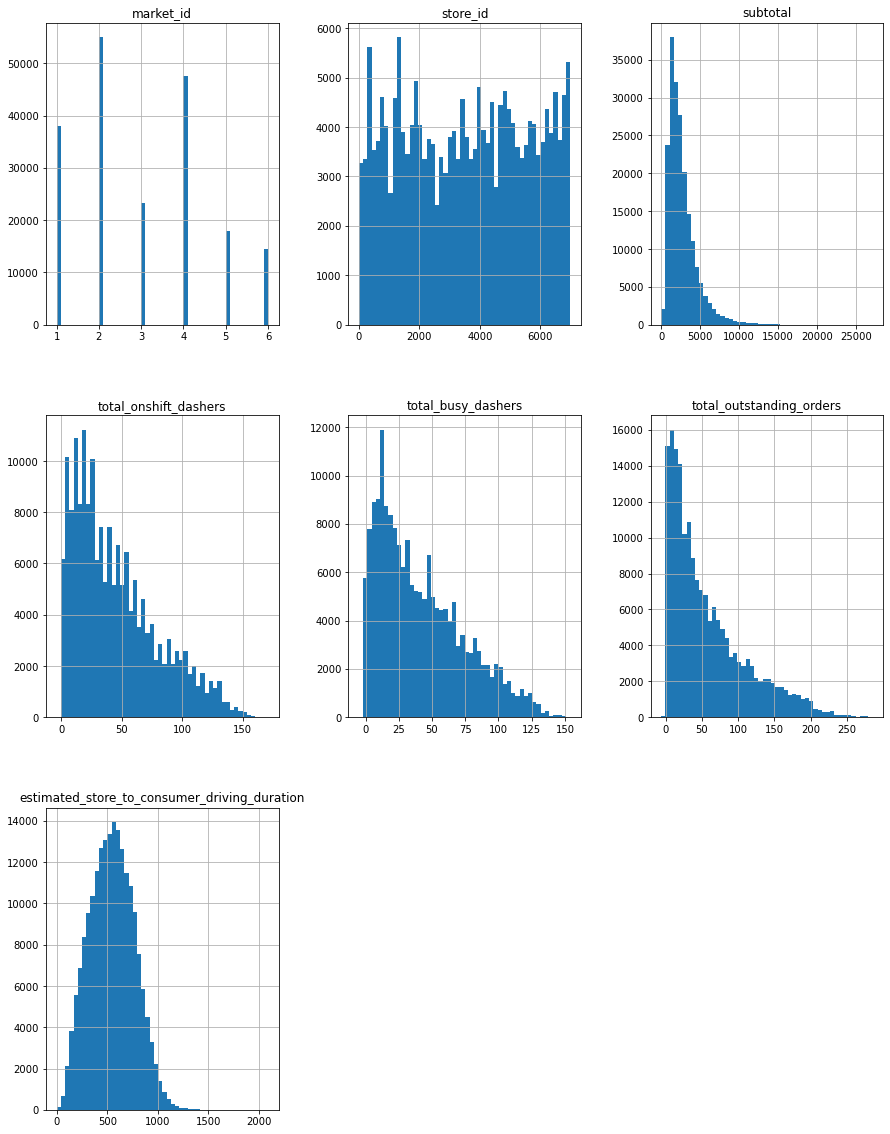

In [12]:
_ = hist_data.hist(bins=50, figsize=(15,20))

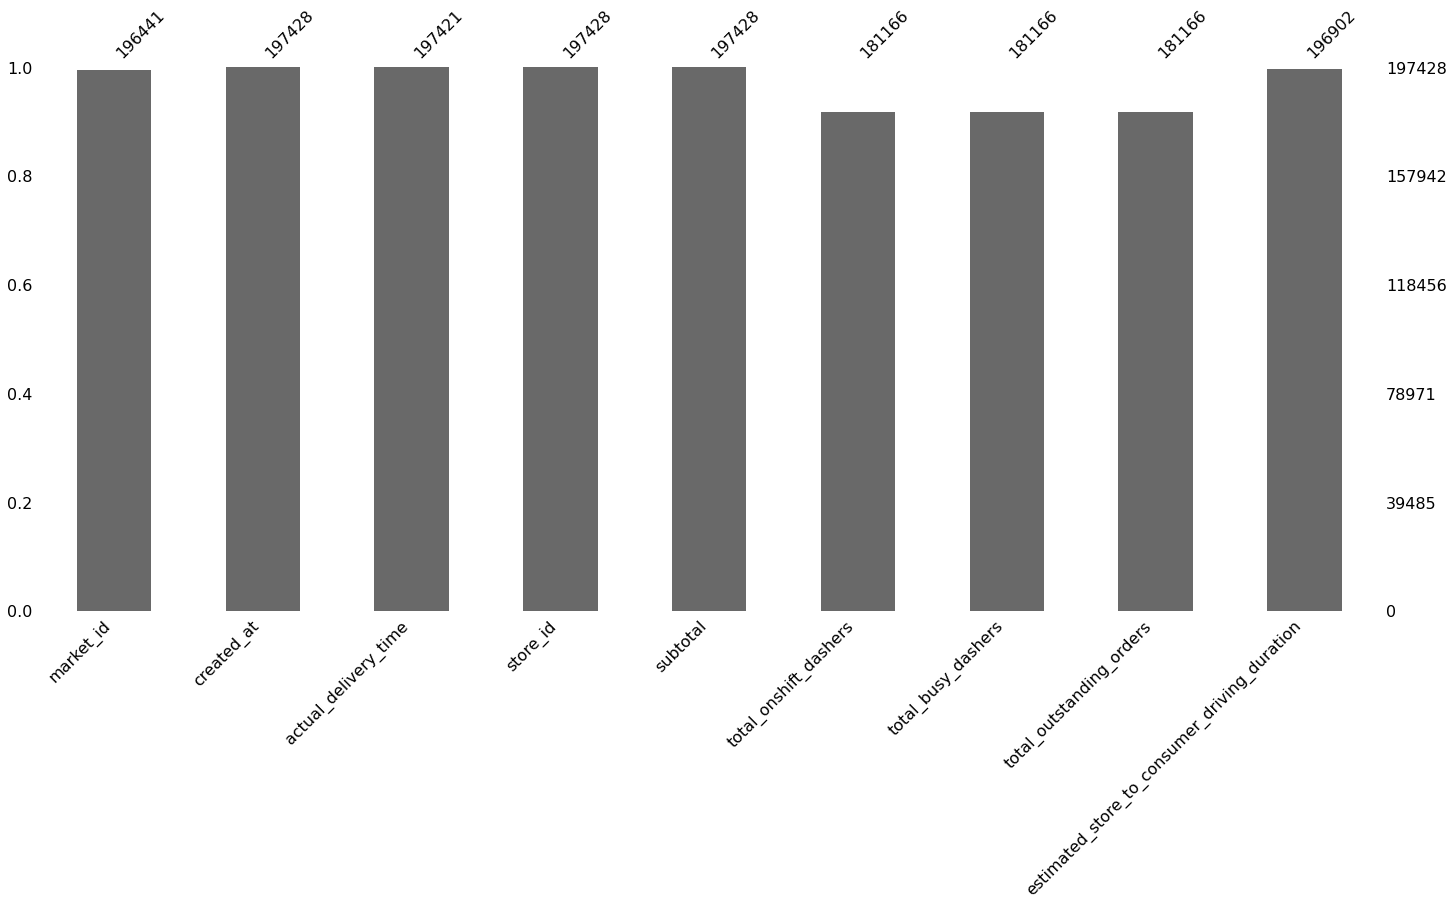

In [13]:
import missingno as msno
_ = msno.bar(hist_data)

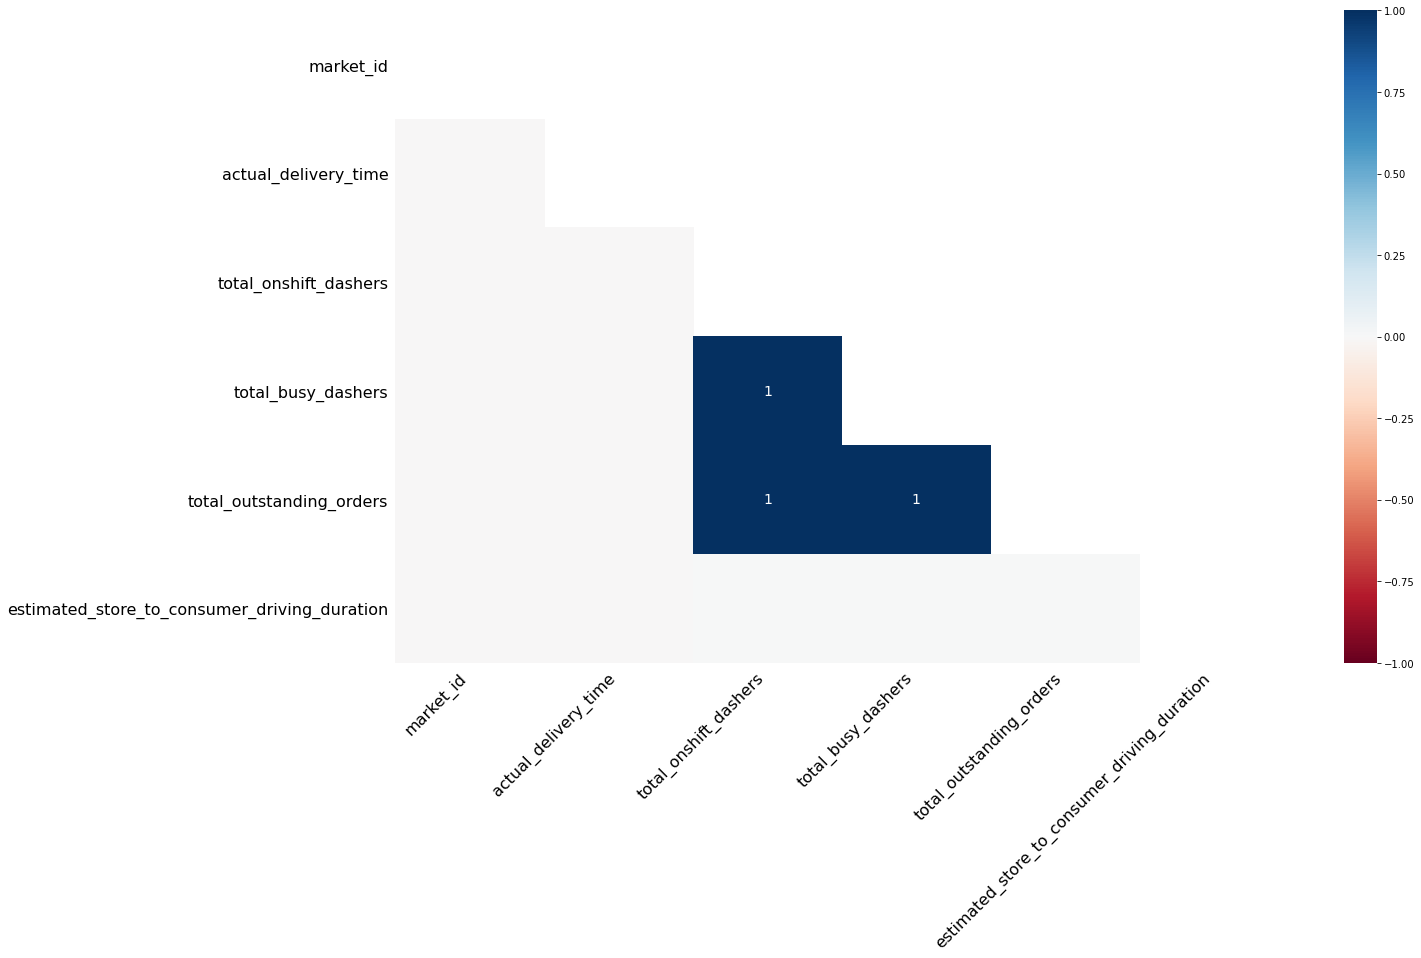

In [14]:
_ = msno.heatmap(hist_data)

#### Data preprocessing steps:  
#### 1. Fill in missing market_id with store id whenever possible  
#### 2. Deal with missing and negative values for total_busy_dashers, total_outstanding_orders, total_onshift_dashers  
#### 3. Estimate values for features above using mean value for market at given time  
#### 4. Create features: total_delivery_duration_seconds and outstanding_orders_per_available_dasher

In [16]:
hist_data.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
subtotal                                          int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [18]:
hist_data['created_at'] = pd.to_datetime(hist_data['created_at'], infer_datetime_format=True)

In [21]:
hist_data['actual_delivery_time'] = pd.to_datetime(hist_data['actual_delivery_time'], infer_datetime_format=True)

In [22]:
hist_data.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
subtotal                                                 int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_store_to_consumer_driving_duration           float64
dtype: object

In [27]:
hist_data['total_delivery_duration_seconds'] = (hist_data['actual_delivery_time'] - \
                                                    hist_data['created_at']).dt.total_seconds()

In [28]:
hist_data.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0,2390.0


In [29]:
hist_data.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
subtotal                                                 int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_store_to_consumer_driving_duration           float64
total_delivery_duration_seconds                        float64
dtype: object

In [32]:
print(1+1)

2


In [38]:
hist_data['total_delivery_duration_seconds'].describe()

count    1.974210e+05
mean     2.908257e+03
std      1.922961e+04
min      1.010000e+02
25%      2.104000e+03
50%      2.660000e+03
75%      3.381000e+03
max      8.516859e+06
Name: total_delivery_duration_seconds, dtype: float64

In [39]:
delivery_minutes = hist_data['total_delivery_duration_seconds'].to_numpy()/60

In [51]:
np.percentile(delivery_minutes, [25,50,75,100])

array([nan, nan, nan, nan])

In [52]:
delivery_minutes = np.array(hist_data['total_delivery_duration_seconds'].values.tolist())/60

In [53]:
np.percentile(delivery_minutes, [25,50,75,100])

array([nan, nan, nan, nan])

In [54]:
print(delivery_minutes[:15])

[ 62.98333333  67.06666667  29.68333333  51.25        39.83333333
  38.33333333  26.4         32.75        26.43333333  53.2
  46.43333333 134.45        42.71666667  38.03333333  37.88333333]


In [56]:
np.quantile(delivery_minutes, [0.25,0.50,0.75,1])

array([nan, nan, nan, nan])

In [57]:
np.percentile(delivery_minutes, [0.25,0.50,0.75,1])

array([nan, nan, nan, nan])

In [15]:
from sklearn.model_selection import train_test_split

Gotta remove null values

In [58]:
delivery_minutes[~np.isnan(delivery_minutes)]

array([62.98333333, 67.06666667, 29.68333333, ..., 50.13333333,
       65.11666667, 37.13333333])

In [59]:
delivery_minutes = delivery_minutes[~np.isnan(delivery_minutes)]

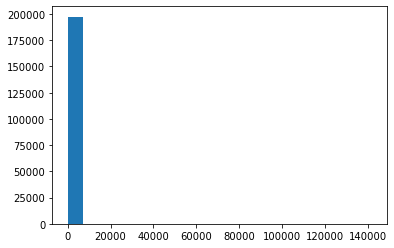

In [61]:
_ = plt.hist(delivery_minutes, bins=20)

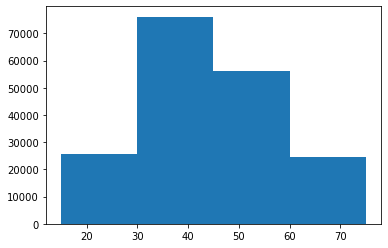

In [62]:
_ = plt.hist(delivery_minutes, bins=[15, 30, 45, 60, 75])